In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [76]:
check_result_df = pd.read_csv('./../results/05-10-02-18-16/val_result.csv')
check_result_df['correct'] = check_result_df['target'] == check_result_df['predict']

In [77]:
check_result_df.columns

Index(['sentence', 'tokenized', 'target', 'predict', 'correct'], dtype='object')

In [78]:
check_result_df.head()

,sentence,tokenized,target,predict,correct
0,카를로 3세(1345년 ~ 1386년 2월 24일) 또는 카로이 2세는 나폴리 왕국...,[CLS] 카로이 2세 [SEP] 1345년 [SEP] 카를로 3세 ( 1345년 ...,per:date_of_birth,per:date_of_birth,True
1,"김선수 대법관이 2018년 8월에 취임하면서 ""특정 로펌과 관계있는 대법관의 사건처...",[CLS] 김선수 [SEP] 대법관 [SEP] 김선수 대법관이 2018년 8월에 취...,per:title,per:title,True
2,한편 지역 전통시장 활성화와 소외계층 지원을 위해 2008년 부산은행에서 시작된 전...,[CLS] 부산은행 [SEP] BNK금융그룹 [SEP] 한편 지역 전통시장 활성화와...,org:member_of,org:member_of,True
3,"두 사람의 새로운 왕 중 필리포스 3세는 정신적 결함이 있었고, 알렉산드로스 4세는...",[CLS] 알렉산드로스 4세 [SEP] 필리포스 3세 [SEP] 두 사람의 새로운 ...,no_relation,no_relation,True
4,"故문지윤 씨는 1984년 2월 18일 생으로, 2002년 MBC 드라마 '로망스'로...",[CLS] 문지윤 [SEP] 2002년 MBC 드라마'로망스'[SEP] 故 문지윤 ...,no_relation,no_relation,True


## 레이블별 정답률 확인

In [79]:
# 레이블별 정답률 확인
label_stats = pd.DataFrame()
label_counts = check_result_df.groupby('target')['predict'].count()
correct_counts = check_result_df.groupby('target')['predict'].apply(lambda x: (x == x.name).sum())
label_stats['total'] = label_counts
label_stats['correct'] = correct_counts
label_stats['correct_ratio'] = label_stats['correct'] / label_stats['total']
label_stats

,total,correct,correct_ratio
target,,,
no_relation,947,687,0.725449
org:alternate_names,127,106,0.834646
org:dissolved,8,6,0.750000
org:founded,41,40,0.975610
org:founded_by,10,5,0.500000
org:member_of,180,145,0.805556
org:members,51,24,0.470588
org:number_of_employees/members,3,2,0.666667
org:place_of_headquarters,119,76,0.638655


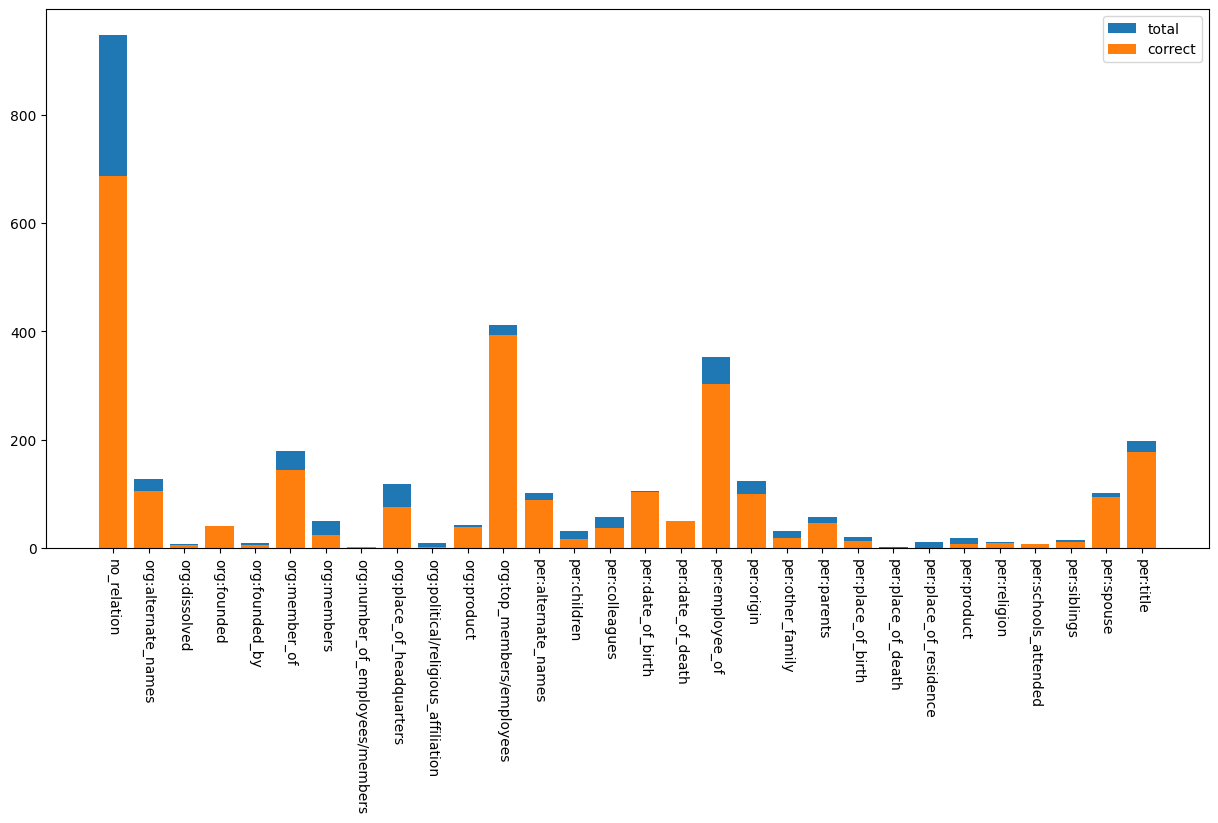

In [80]:
# 레이블 별 총 데이터 개수와 정답 데이터 개수 비교
plt.figure(figsize = (15, 7))
plt.bar(label_stats.index, label_stats['total'], label="total")
plt.bar(label_stats.index, label_stats['correct'], label="correct")
plt.legend()
plt.xticks(rotation=-90)
plt.show()

## HEATMAP으로 체크

In [81]:
df = check_result_df[['target','predict']]
labels = list(label_stats.index)

new_df = pd.DataFrame()#columns=labels,index=labels)
# new_df.fillna(0,inplace=True)

for trgt in labels:
    temp_lst = []
    for pred in labels:
        count = len(df[(df['target'] == trgt) & (df['predict'] == pred)])
        temp_lst.append(count)
    new_df[trgt] = temp_lst
new_df.columns = labels
new_df['predict'] = labels
new_df.set_index('predict',inplace=True)
# new_df.reset_index(inplace=True,drop=True)#labels,inplace=True)
new_df

,no_relation,org:alternate_names,org:dissolved,org:founded,org:founded_by,org:member_of,org:members,org:number_of_employees/members,org:place_of_headquarters,org:political/religious_affiliation,...,per:parents,per:place_of_birth,per:place_of_death,per:place_of_residence,per:product,per:religion,per:schools_attended,per:siblings,per:spouse,per:title
predict,,,,,,,,,,,,,,,,,,,,,
no_relation,687,13,2,1,0,27,17,1,20,5,...,1,0,0,2,6,1,0,2,2,15
org:alternate_names,5,106,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
org:dissolved,3,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
org:founded,10,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
org:founded_by,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
org:member_of,36,2,0,0,0,145,3,0,15,0,...,0,0,0,0,0,0,0,0,0,0
org:members,15,2,0,0,0,0,24,0,6,0,...,0,0,0,0,0,0,0,0,0,0
org:number_of_employees/members,1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
org:place_of_headquarters,11,2,0,0,0,6,4,0,76,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_df.sum()

In [ ]:
# dataset normalize안하고 heatmap 

labels = list(label_stats.index)

plt.pcolor(new_df)
plt.xticks(np.arange(0.5, len(labels), 1), labels)
plt.xticks(rotation=90)
plt.yticks(np.arange(0.5, len(labels), 1), labels)

plt.title('label accuracy', fontsize=14)
plt.xlabel('target', fontsize=14)
plt.ylabel('predict', fontsize=14)
plt.colorbar()

plt.show()

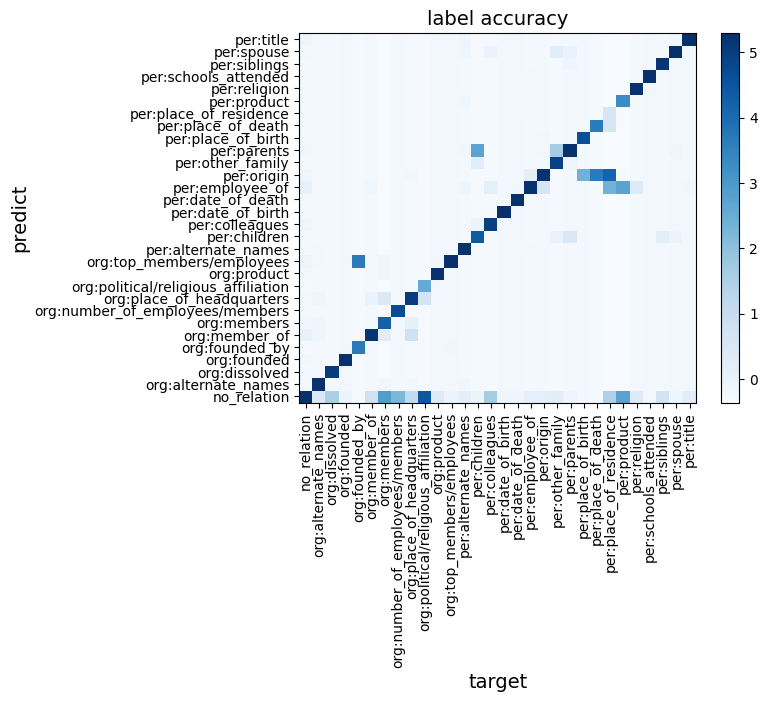

In [82]:
# dataset normalize 하고 heatmap 

labels = list(label_stats.index)

normalization_df = (new_df - new_df.mean())/new_df.std()
normalization_df.head()

plt.pcolor(normalization_df,cmap='Blues')

plt.xticks(np.arange(0.5, len(labels), 1), labels)
plt.xticks(rotation=90)
plt.yticks(np.arange(0.5, len(labels), 1), labels)

plt.title('label accuracy', fontsize=14)
plt.xlabel('target', fontsize=14)
plt.ylabel('predict', fontsize=14)

plt.colorbar()

plt.show()

## 💡 결론
- klue/bert-base 10 epoch (no earlystop)
- 전반적으로 잘 맞추는데 per:place_of_residence, per:product, org:product를 잘 못맞추는 경향